In [1]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')


Load the Dataset

In [4]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
df.head()


,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


Data Overview

In [6]:
# Shape & Info
print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isna().sum())


Rows: 168029 | Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168029 entries, 0 to 168028
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      168029 non-null  object 
 1   brand_name        168029 non-null  object 
 2   rating            168029 non-null  float64
 3   rating_count      168029 non-null  int64  
 4   marked_price      168029 non-null  int64  
 5   discounted_price  168029 non-null  int64  
 6   sizes             168029 non-null  object 
 7   product_link      168029 non-null  object 
 8   img_link          168029 non-null  object 
 9   product_tag       168029 non-null  object 
 10  brand_tag         168029 non-null  object 
 11  discount_amount   168029 non-null  int64  
 12  discount_percent  168029 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 16.7+ MB

Missing Values per Column:
product_name        0
brand_name          0
rating 

Clean the Data

In [7]:
# Remove duplicate columns by name
df = df.loc[:, ~df.columns.duplicated()]

# Drop useless columns
drop_cols = ['product_link', 'img_link']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Remove duplicate rows
df = df.drop_duplicates()

print("\nAfter cleaning, shape:", df.shape)



After cleaning, shape: (134666, 11)


Basic Data Summary

In [8]:
# Summary of numeric columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
rating,134666.0,2.520875,2.066954,0.0,0.0,3.8,4.3,5.0
rating_count,134666.0,134.476171,852.587557,0.0,0.0,8.0,40.0,55900.0
marked_price,134666.0,2535.965455,2434.049172,50.0,1299.0,1999.0,2999.0,113999.0
discounted_price,134666.0,1518.929344,1835.236658,49.0,665.0,999.0,1724.0,45900.0
discount_amount,134666.0,1017.036112,1241.466400,0.0,240.0,740.0,1345.0,68400.0
discount_percent,134666.0,38.035792,24.460437,0.0,15.0,43.0,60.0,91.0


Brand Distribution

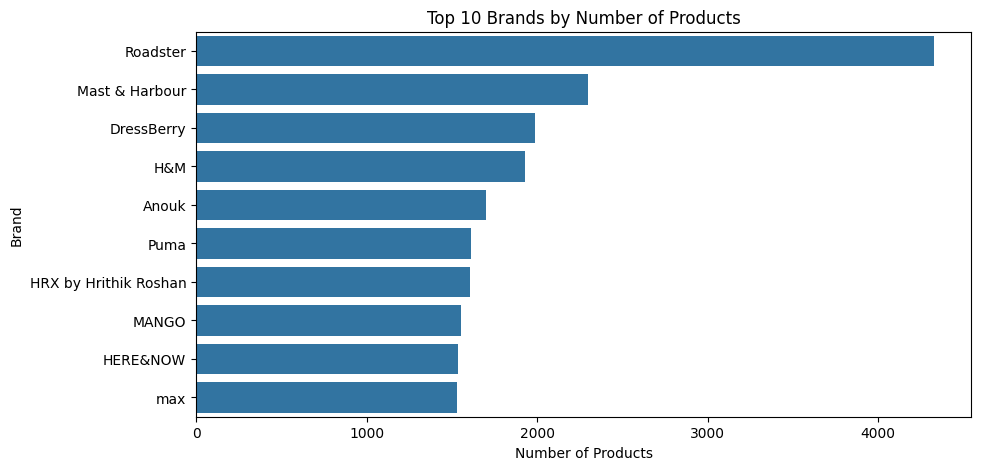

Top Brands:
 brand_name
Roadster                 4328
Mast & Harbour           2298
DressBerry               1985
H&M                      1928
Anouk                    1702
Puma                     1613
HRX by Hrithik Roshan    1609
MANGO                    1551
HERE&NOW                 1539
max                      1533
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(10,5))
top_brands = df['brand_name'].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

print("Top Brands:\n", top_brands)



Price & Discount Insights


Top 10 Brands with Highest Average Discount (%):
 brand_name
swatika       90.000000
HRITIKA       89.589744
OOMPH         87.357143
Brandsoon     85.769231
HAMT          85.538462
Kord Store    85.500000
Dhrohar       84.333333
VAIVIDHYAM    84.250000
WM            84.000000
TIMESMITH     84.000000
Name: discount_percent, dtype: float64


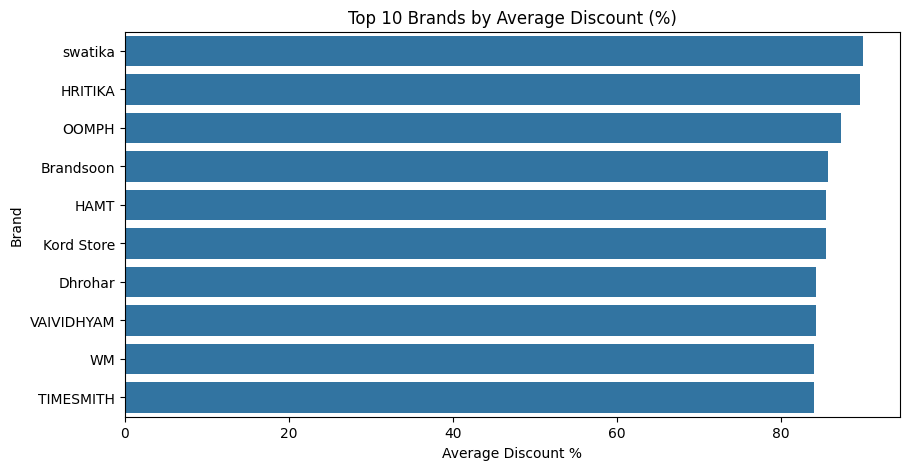

In [10]:
# Price Difference column
df['price_diff'] = df['marked_price'] - df['discounted_price']

# Average discount by brand
avg_discount = df.groupby('brand_name')['discount_percent'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Brands with Highest Average Discount (%):\n", avg_discount)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_discount.values, y=avg_discount.index)
plt.title("Top 10 Brands by Average Discount (%)")
plt.xlabel("Average Discount %")
plt.ylabel("Brand")
plt.show()



Rating Insights


Top 10 Brands by Average Rating:
 brand_name
Pro-Ethic STYLE DEVELOPER    5.0
MILDCARES                    5.0
Pasabahce                    5.0
BEAUTY GLAZED                5.0
Joseph Joseph                5.0
Ozone Ayurvedics             5.0
1 Stop Fashion               5.0
TIC TAC TOE                  4.9
Bodycare First               4.9
Instabuyz                    4.9
Name: rating, dtype: float64


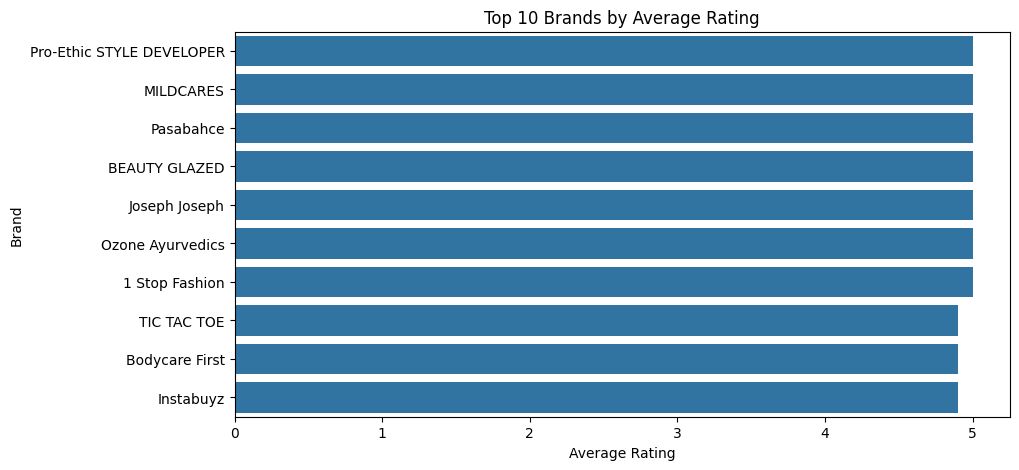

In [11]:
# Average rating per brand
avg_rating = df.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Brands by Average Rating:\n", avg_rating)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index)
plt.title("Top 10 Brands by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.show()




Relationship: Price vs Rating

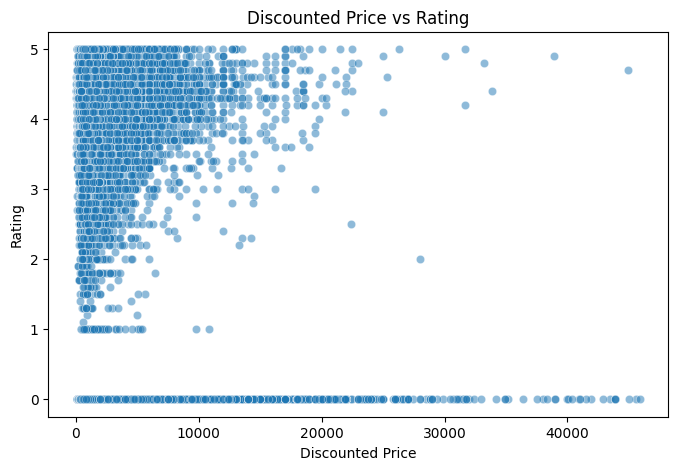

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discounted_price', y='rating', alpha=0.5)
plt.title("Discounted Price vs Rating")
plt.xlabel("Discounted Price")
plt.ylabel("Rating")
plt.show()



Relationship: Discount vs Rating

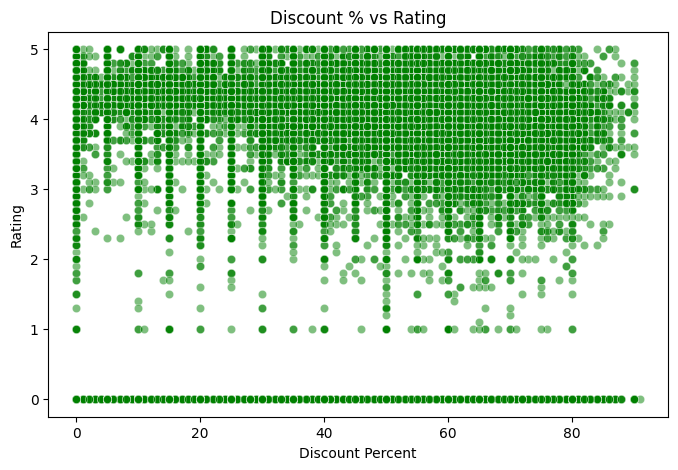

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discount_percent', y='rating', alpha=0.5, color='green')
plt.title("Discount % vs Rating")
plt.xlabel("Discount Percent")
plt.ylabel("Rating")
plt.show()



Correlation Heatmap

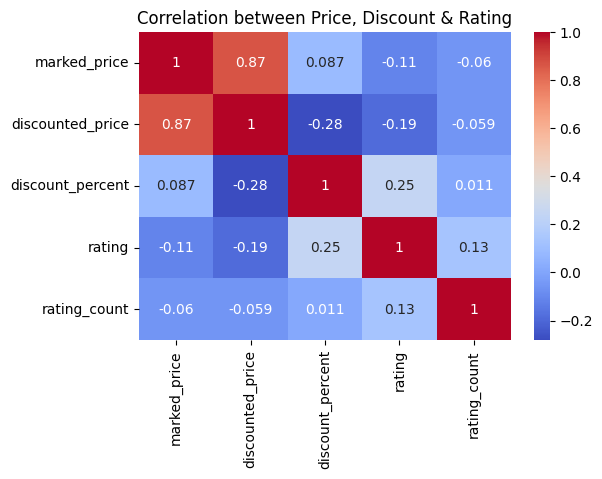

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['marked_price','discounted_price','discount_percent','rating','rating_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Price, Discount & Rating")
plt.show()



Text-Based Insights Summary

In [15]:
print("🧠 INSIGHTS SUMMARY:")
print("1️⃣", "Top brand by product count:", df['brand_name'].value_counts().idxmax())
print("2️⃣", "Average overall discount:", round(df['discount_percent'].mean(), 2), "%")
print("3️⃣", "Average overall rating:", round(df['rating'].mean(), 2))
print("4️⃣", "Most expensive product:", df.loc[df['discounted_price'].idxmax(), 'product_name'])
print("5️⃣", "Cheapest product:", df.loc[df['discounted_price'].idxmin(), 'product_name'])



🧠 INSIGHTS SUMMARY:
1️⃣ Top brand by product count: Roadster
2️⃣ Average overall discount: 38.04 %
3️⃣ Average overall rating: 2.52
4️⃣ Most expensive product: Men Automatic Motion Watch
5️⃣ Cheapest product: Nail Pops Nail Polish- 28
